In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

# Playing with a Gaussian function



(100,) (100,)
mean is  0.09621799404026983
std is  1.412856705614949


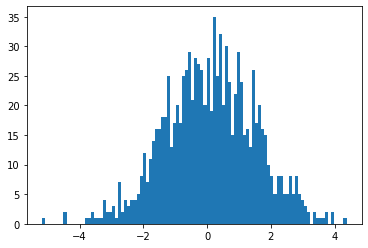

In [19]:
mu = 0
sigma = np.sqrt(2)
r = np.random.normal(mu, sigma, size=1000)
yr, xr = np.histogram(r,bins=100)

xr = xr[:-1]
print(xr.shape, yr.shape)
print('mean is ', np.mean(r))
print('std is ', np.std(r))

plt.hist(r,bins=100);

In [20]:
def gaussian_model(x, a, b, c, d):
    y = a*np.exp(-np.power(x-b,2)/2/c**2) + d    
    return y

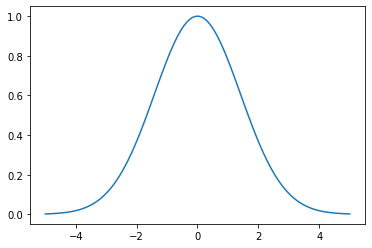

In [11]:
# test plotting of a gaussian curve with arbitrary variables 
x = np.linspace(-5,5,100)
a = 1
b = 0
c = np.sqrt(2)
d = 0
y = gaussian_model(x,a,b,c,d)

plt.plot(x,y)

[26.9011768   0.05263698  1.43023454 -0.08433845]
[[ 7.75283170e-01 -1.91565434e-04  3.72989546e-03 -3.16522009e-01]
 [-1.91565434e-04  2.05491309e-03 -1.66112022e-05  2.47276358e-04]
 [ 3.72989546e-03 -1.66112022e-05  4.37731290e-03 -3.17881521e-02]
 [-3.16522009e-01  2.47276358e-04 -3.17881521e-02  4.35815989e-01]]


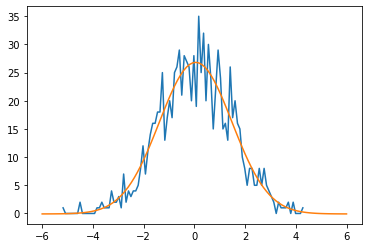

In [22]:
from scipy.optimize import curve_fit 
from sklearn.metrics import r2_score 


popt, pcov = curve_fit(gaussian_model, xr, yr)
print(popt)
print(pcov)

x = np.linspace(-6,6,100)
yfit = gaussian_model(x, popt[0],popt[1],popt[2],popt[3])
plt.plot(xr, yr)
plt.plot(x,yfit)



In [23]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(yfit - yr)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yfit - yr) ** 2))
print("R2-score: %.2f" % r2_score(yfit , yr) )


Mean absolute error: 3.34
Residual sum of squares (MSE): 26.86
R2-score: 0.69
